In [1]:
import numpy as np
import scipy as sy
from scipy.misc import derivative
import quantecon as qe
import sympy as sp
from matplotlib import pyplot as plt
import numpy.linalg as la
from scipy import sparse

Problem 1
=================

In [2]:
def p1(A, b, tol, maxiters):
    
    iters = 0
    error = 50
    x = np.random.rand(len(b))
    x1 = np.zeros(len(x))
    
    d = np.diag(1/A)
    D = np.diag(d)
    
    while (iters < maxiters and error > tol):
        
        x1 = x + D @ (b - (A @ x))
        error = la.norm( x1 - x, np.inf)
        x = x1
    
    return x1
    
def diag_dom(n, num_entries=None):

    if num_entries is None:
        num_entries = int(n**1.5) - n
        A = np.zeros((n,n))
        rows = np.random.choice(np.arange(0,n), size=num_entries)
        cols = np.random.choice(np.arange(0,n), size=num_entries)
        data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A   

A = diag_dom(3) 
b = np.random.random(3)
tol = 1e-10
maxiters = 1000

x1 = p1(A, b, tol, maxiters)

print(x1)
print(np.allclose(A@x1, b,atol=1e-6))

[ 0.36559934 -0.08732921  0.17327043]
True


/Users/bryanchia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


It really doesn't work for weird matrices that are randomly generated. 

Problem 2
=============

/Users/bryanchia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


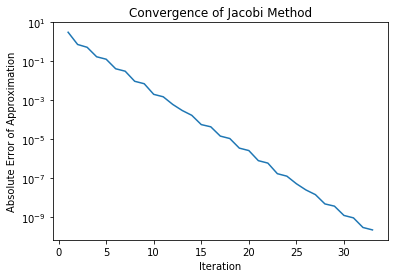

[ 0.05106398  0.16235745  0.21700891  0.14241918  0.12617932  0.12027527
  0.03450416  0.18888449]
True


In [113]:
def p2(A, b, tol, maxiters, plot = False):
    
    iters = 0
    error = 5
    x = np.random.rand(len(b))
    x1 = np.zeros(len(x))
    error_vec = np.zeros((maxiters + 1))
    d = np.diag(1/A)
    D = np.diag(d)
    
    while (iters < maxiters and error > tol):
        
        x1 = x + D @ (b - (A @ x))
        error = la.norm( x1 - x, np.inf)
        x = x1
        iters +=1
        diff = la.norm(A @ x1 - b, np.inf)
        error_vec[iters] = diff
        
    check = np.where(error_vec != 0)
    error_vec = error_vec[check]
        
    if plot == True:
        iters_vec = np.arange(1, len(error_vec) + 1)
        plt.plot(iters_vec, error_vec)
        plt.title('Convergence of Jacobi Method')
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error of Approximation')
        plt.semilogy()
        plt.show()
    
    return x1

A = diag_dom(8)
b = np.random.random(8)
tol = 1e-10
maxiters = 1000
x1 = p2(A, b, tol, maxiters, True)
print(x1)
print(np.allclose(A@x1, b,atol=1e-10))

Problem 3
=============

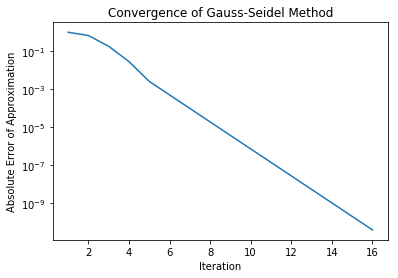

[ 0.05106398  0.16235745  0.21700891  0.14241918  0.12617932  0.12027527
  0.03450416  0.18888449]
True


In [141]:
def p3 (A, b, tol, maxiters, plot = False):
    
    iters = 0
    iters1 = 0
    error = 5
    x0 = np.random.rand(len(b))
    x1 = np.zeros(len(x0))
    error_vec = np.zeros((maxiters + 1))
    
    while (error > tol and iters < maxiters):
        
        x = np.copy(x0)
        for i in range (0, len(x)):
            x1[i] = x0[i] + (1. / A[i,i]) * (b[i] - (A[i][:].T @ x0))
            
        x0 = x1
        error = la.norm(x1 - x) 
        iters +=1
    
        #diff = la.norm(A @ x1 - b)
        error_vec[iters] = error
    
    check = np.where(error_vec != 0)
    error_vec = error_vec[check]
        
    if plot == True:
        iters_vec = np.arange(1, len(error_vec) + 1)
        plt.plot(iters_vec, error_vec)
        plt.title('Convergence of Gauss-Seidel Method')
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error of Approximation')
        plt.semilogy()
        plt.show()
    
    return x1

tol = 1e-10
maxiters = 1000
x2 = p3(A, b, tol, maxiters, True)
print(x2)
print(np.allclose(A@x2, b, atol=1e-5))

Problem 4
==========

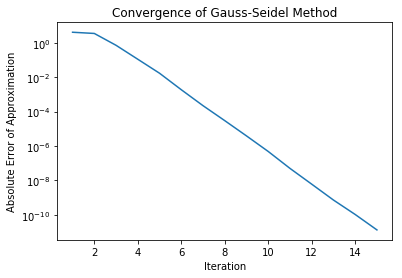

True


In [122]:
def p4 (A, b, tol, maxiters, plot = False):
    
    iters = 0
    iters1 = 0
    error = 5
    x0 = np.random.rand(len(b))
    x1 = np.zeros(len(x0))
    error_vec = np.zeros((maxiters + 1))
    
    while (error > tol and iters < maxiters):
        
        x = np.copy(x1)
        for i in range (0, len(x)):
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            Aix = A.data[rowstart:rowend] @ x0[A.indices[rowstart:rowend]]
            x1[i] = x0[i] + (1. / A[i,i]) * (b[i] - Aix)
        
        x0 = x1
        error = la.norm(x1 - x) 
        iters +=1
    
        #diff = la.norm(A @ x1 - b)
        error_vec[iters] = error
    
    check = np.where(error_vec != 0)
    error_vec = error_vec[check]
        
    if plot == True:
        iters_vec = np.arange(1, len(error_vec) + 1)
        plt.plot(iters_vec, error_vec)
        plt.title('Convergence of Gauss-Seidel Method')
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error of Approximation')
        plt.semilogy()
        plt.show()
    
    return x1

B = sparse.csr_matrix(diag_dom(500))
c = np.random.random(500)

#For testing
#sA = sparse.csr_matrix(A) 

tol = 1e-10
maxiters = 100
x4 = p4(B, c, tol, maxiters, True)
print(np.allclose(B@x4, c, atol=1e-5))
#print(x4)

Problem 5
=============

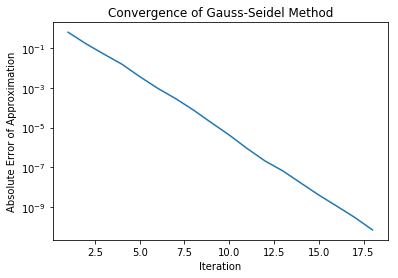

18
True


In [161]:
def p5 (A, b, tol, maxiters, omega, plot = False):
    
    iters = 0
    iters1 = 0
    error = 5
    x0 = np.random.rand(len(b))
    x1 = np.zeros(len(x0))
    error_vec = np.zeros((maxiters + 1))
    
    while (error > tol and iters < maxiters):
        
        x0 = np.copy(x1)
        for i in range (0, len(x0)):
            rowstart = A.indptr[i]
            rowend = A.indptr[i+1]
            Aix = A.data[rowstart:rowend] @ x0[A.indices[rowstart:rowend]]
            x1[i] = x0[i] +  omega / A[i,i] * (b[i] - Aix)
        
        #x0 = x1
        error = la.norm( x1 - x0) 
        iters +=1
    
        diff = la.norm(A @ x1 - b, np.inf)
        error_vec[iters] = diff
    
    check = np.where(error_vec != 0)
    error_vec = error_vec[check]
        
    if plot == True:
        iters_vec = np.arange(1, len(error_vec) + 1)
        plt.plot(iters_vec, error_vec)
        plt.title('Convergence of Gauss-Seidel Method')
        plt.xlabel('Iteration')
        plt.ylabel('Absolute Error of Approximation')
        plt.semilogy()
        plt.show()
    
    return x1, iters

#C = sparse.csr_matrix(diag_dom(500))
#d = np.random.random(500)
tol = 1e-10
omega = 1
maxiters = 10000

x5, iters = p5(B, c, tol, maxiters, omega, True)
print(iters)
print(np.allclose(B@x5, c, atol=1e-5))
#print(x5)

Problem 6
============

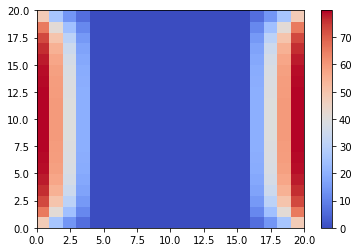

In [163]:
from scipy import sparse
from matplotlib import pyplot as plt

def f6(n, omega, tol = 1e-8, maxiters = 100, plot = False ):
    
    nx, ny = n, n
    N = nx * ny
    row = np.zeros(n)
    row[0] = -100
    row[n - 1]  = -100
    b = np.tile(row, n)
    
    main_diag = np.ones(N) * (-4.0)
    side_diag = np.ones(N-1)
    side_diag[np.arange(1,N)%4 == 0] = 0
    up_down_diag = np.ones(N-3)
    diagonals = [main_diag, side_diag, side_diag, up_down_diag, up_down_diag]
    A = sparse.diags(diagonals, [0,-1, 1, nx, -nx], format = 'csr')
    
    U= p5(A, b, tol, maxiters, omega, plot = False)[0]
    
    U = U.reshape((n,n))
    
    if plot == True:
        
        x = np.arange(0, n + 1)
        y = np.arange(0, n + 1)
        
        plt.pcolormesh(x, y, U, cmap= "coolwarm")
        plt.colorbar()
        plt.show()
        
        pass
        
    return U

n = 20
omega = 1
U = f6(n, omega, plot = True)

Problem 7
=================

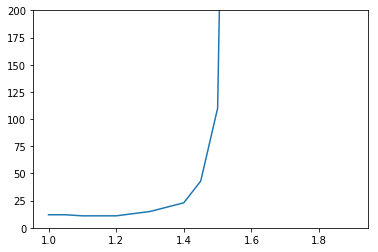

Optimal Omega:  1.1


In [164]:
C = sparse.csr_matrix(diag_dom(500))
d = np.random.random(500)
tol = 1e-2
omega = np.arange(1, 1.95, 0.05)
maxiters = 1000
iters = np.zeros(len(omega))
    
for i in range (0, len(omega)):
    x4, iters[i] = p5(sA, b, tol, maxiters, omega[i], False)

plt.clf
plt.plot(omega, iters)
plt.ylim([0, 200])
plt.show()
        
minindex = np.argmin(iters)
print('Optimal Omega: ', omega[minindex])